In [2]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/NYC_yellow_taxi/nyc_taxi_part_1.csv')
df_train.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2024-01-03T19:42:57.000,2024-01-03T20:15:55.000,1.0,16.67,1.0,N,132,165,1,65.30,0.0,0.5,5.00,0.00,1.0,73.55,0.0,1.75
1,2,2024-01-03T18:43:26.000,2024-01-03T18:43:29.000,2.0,0.01,5.0,N,95,95,1,86.69,0.0,0.0,17.54,0.00,1.0,105.23,0.0,0.00
2,2,2024-01-03T17:00:52.000,2024-01-03T17:01:05.000,2.0,0.00,5.0,N,265,265,1,120.00,0.0,0.0,0.00,0.00,1.0,121.00,0.0,0.00
3,2,2024-01-03T10:00:04.000,2024-01-03T11:08:22.000,1.0,21.60,1.0,N,132,136,1,82.10,0.0,0.5,18.46,6.94,1.0,110.75,0.0,1.75
4,2,2024-01-01T00:01:58.000,2024-01-01T00:10:04.000,3.0,1.70,1.0,N,234,144,1,10.70,1.0,0.5,2.36,0.00,1.0,18.06,2.5,0.00


In [5]:
# df_train2 = pd.read_csv('/content/drive/MyDrive/NYC_yellow_taxi/nyc_taxi_part_2.csv')
# df_train2.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-10-03T16:31:17.000,2023-10-03T16:43:05.000,1.0,1.66,1.0,N,151,143,1,12.8,2.5,0.5,3.86,0.0,1.0,23.16,2.5,0.0
1,2,2023-10-03T16:31:17.000,2023-10-03T16:38:25.000,1.0,0.68,1.0,N,100,161,1,7.9,2.5,0.5,2.88,0.0,1.0,17.28,2.5,0.0
2,2,2023-10-03T16:31:16.000,2023-10-03T16:47:14.000,1.0,1.99,1.0,N,161,137,2,15.6,2.5,0.5,0.00,0.0,1.0,22.10,2.5,0.0
3,2,2023-10-03T16:31:16.000,2023-10-03T16:51:33.000,1.0,3.14,1.0,N,211,50,1,20.5,2.5,0.5,5.40,0.0,1.0,32.40,2.5,0.0
4,2,2023-10-03T16:31:15.000,2023-10-03T16:46:46.000,1.0,2.01,1.0,N,125,68,1,14.9,2.5,0.5,4.28,0.0,1.0,25.68,2.5,0.0


In [ ]:
# df_train3 = pd.read_csv('/content/drive/MyDrive/NYC_yellow_taxi/nyc_taxi_part_3.csv')
# df_train3.head()

In [ ]:
# import dask.dataframe as dd
# df_train_try = dd.read_csv('/content/drive/MyDrive/NYC_yellow_taxi/nyc_taxi_half.csv')
# df_train_try.head()

In [5]:
df_train.dtypes

,0
vendorid,int64
tpep_pickup_datetime,object
tpep_dropoff_datetime,object
passenger_count,float64
trip_distance,float64
ratecodeid,float64
store_and_fwd_flag,object
pulocationid,int64
dolocationid,int64
payment_type,int64


In [6]:
df_train.describe()

,vendorid,passenger_count,trip_distance,ratecodeid,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,1.000000e+07,9.543248e+06,1.000000e+07,9.543248e+06,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,9.543248e+06,9.543248e+06
mean,1.746629e+00,1.375560e+00,3.713677e+00,1.736911e+00,1.655373e+02,1.645256e+02,1.167102e+00,1.977041e+01,1.503894e+00,4.838714e-01,3.588160e+00,5.989998e-01,9.772364e-01,2.878365e+01,2.271090e+00,1.460875e-01
std,4.379429e-01,8.855171e-01,1.526654e+02,8.005711e+00,6.397712e+01,6.960541e+01,5.756386e-01,1.900261e+01,1.834909e+00,1.172450e-01,4.355619e+00,2.241589e+00,2.106387e-01,2.390327e+01,7.999972e-01,4.934732e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.087300e+03,-3.917000e+01,-5.000000e-01,-1.000000e+02,-7.775000e+01,-1.000000e+00,-1.094050e+03,-2.500000e+00,-1.750000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.610000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.700000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.420000e+01,1.000000e+00,5.000000e-01,2.860000e+00,0.000000e+00,1.000000e+00,2.148000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.280000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.260000e+01,2.500000e+00,5.000000e-01,4.550000e+00,0.000000e+00,1.000000e+00,3.156000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,9.000000e+00,2.055442e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.339000e+03,6.500000e+01,5.209000e+01,4.174000e+03,2.700000e+02,1.000000e+00,6.339000e+03,2.500000e+00,1.750000e+00


## 异常数据 abnormal data
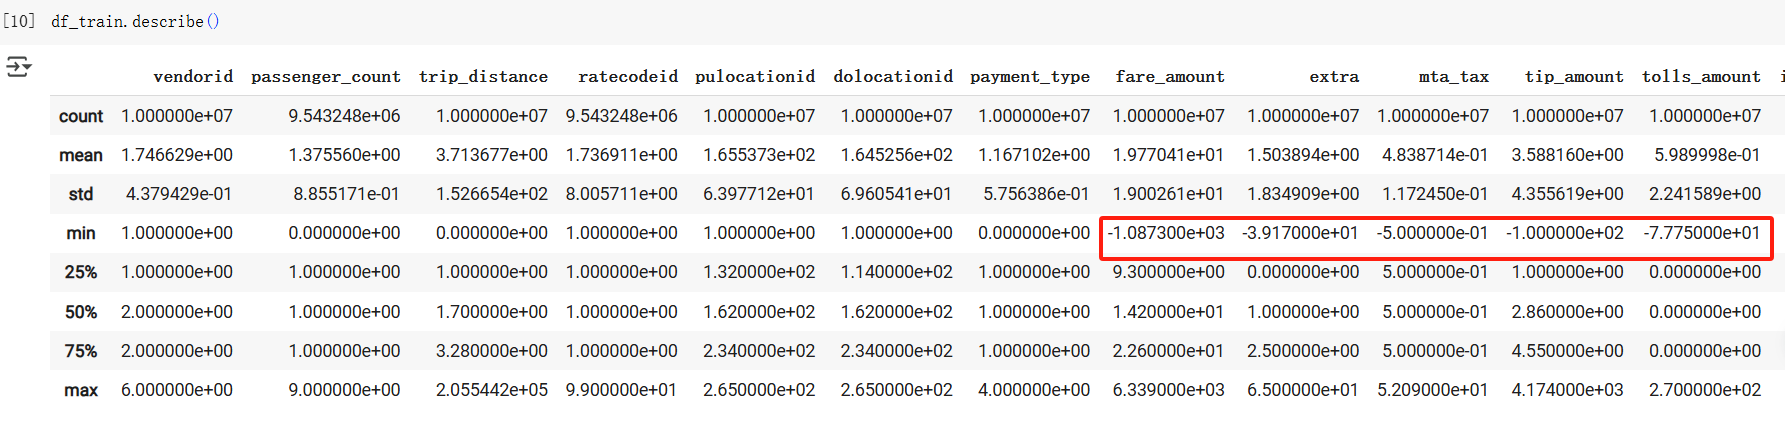


In [7]:
df_train['vendorid'].value_counts(dropna=False)

,count
vendorid,
2,7459744
1,2538946
6,1310


In [8]:
df_train['passenger_count'].value_counts(dropna=False)

,count
passenger_count,
1.0,7167880
2.0,1471426
NaN,456752
3.0,360816
4.0,220693
0.0,127195
5.0,120336
6.0,74754
8.0,104


In [9]:
df_train.shape

(10000000, 19)

### VendorID  供应商 ID
### tpep_pickup_datetime 仪表启动的日期和时间
### tpep_dropoff_datetime 仪表停止运转的日期和时间
### **passenger_count  乘客人数**
### trip_distance  行程距离（英里）
### **RatecodeID  费率代码 ID(行程结束时有效的最终费率代码。)**
### **store_and_fwd_flag** 该标志表示行程记录在发送给供应商之前是否保存在车辆内存中，即“存储和转发”，因为车辆没有连接到服务器。
### PULocationID  PU 位置 ID（计程器启用的 TLC 出租车区域）
### DOLocationID  DO 计程器已停用的 TLC 出租车区域
### payment_type  付款类型
### fare_amount  票价金额
### extra  额外的（杂项附加费和附加费。）
### mta_tax 根据使用的计量费率自动触发的税
### tip_amount  小费金额（不含现金小费）
### tolls_amount  通行费金额（行程中支付的所有通行费的总金额。）
### improvement_surcharge  改进附加费（改善附加费按起步价计算。改善附加费于 2015 年开始征收。）
### total_amount  总金额（向乘客收取的总金额。不包括现金小费。）
### **congestion_surcharge**  拥堵附加费（行程中收取的纽约州交通拥堵附加费总额。）
### **airport_fee**  机场费（	For pick up only at LaGuardia and John F. Kennedy Airports.仅限在拉瓜地亚机场和约翰肯尼迪机场接机。）

In [10]:
df_train.isnull().sum()

,0
vendorid,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,456752
trip_distance,0
ratecodeid,456752
store_and_fwd_flag,456752
pulocationid,0
dolocationid,0
payment_type,0


最高票价（美元/英里）似乎很高。这可能是由于距离或票价数据错误造成的。另一方面，让我们进一步分析一下。一般来说，出租车费用的计算方式如下：

$$
y_{fare} = \theta_0 + \theta_1 \cdot x_{distance} + \theta_2 \cdot x_{duration}
$$

其中 $\theta_0$ 为起始票价，$x_{distance}$ 为行驶距离，$x_{duration}$ 为行程时长。

如果我们重写上述公式，就能得到每段距离票价的表达式：

$$
\frac{y_{fare}}{x_{distance}} = \frac{\theta_0}{x_{distance}} + \theta_1 + \theta_2 \cdot \frac{x_{duration}}{x_{distance}}
$$

我们进一步假设，对于较短的行程，$x_{distance} = c \cdot x_{duration}$，其中 $c$ 是平均速度，那么我们得到：

$$
\frac{y_{fare}}{x_{distance}} = \frac{\theta_0}{x_{distance}} + \theta_1 + \frac{\theta_2}{c} \cdot \frac{x_{duration}}{x_{duration}} = \frac{\theta_0}{x_{distance}} + \theta_1'
$$

其中 $\theta_1' = \theta_1 + \frac{\theta_2}{c}$。


In [11]:
print('Old size: %d' % len(df_train))
df_train = df_train[df_train.fare_amount>=0]
print('New size: %d' % len(df_train))

Old size: 10000000
New size: 9886035


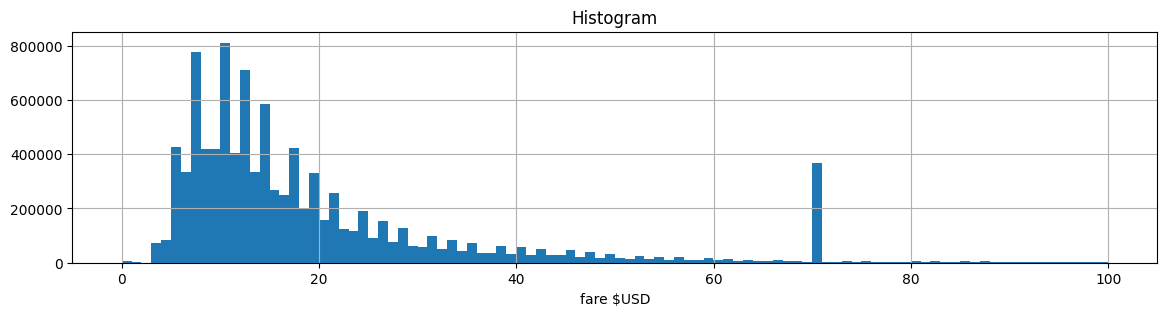

In [12]:
# plot histogram of fare
df_train[df_train.fare_amount<100].fare_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('fare $USD')
plt.title('Histogram');

In [13]:
print('Old size: %d' % len(df_train))
df_train = df_train[df_train.total_amount>=0]
print('New size: %d' % len(df_train))

Old size: 9886035
New size: 9885574


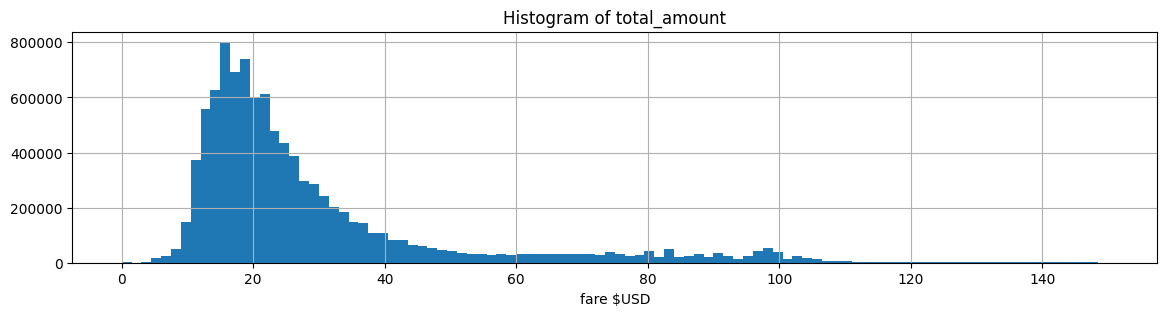

In [14]:
# plot histogram of fare
df_train[df_train.total_amount<150].total_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('fare $USD')
plt.title('Histogram of total_amount');

In [15]:
df_train.isnull().sum()

,0
vendorid,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,453184
trip_distance,0
ratecodeid,453184
store_and_fwd_flag,453184
pulocationid,0
dolocationid,0
payment_type,0


In [16]:
df_missing = df_train[df_train['passenger_count'].isna() & df_train['passenger_count'].isna()]
df_missing

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
25,2,2023-12-31T23:58:47.000,2024-01-01T00:13:47.000,NaN,2.88,NaN,NaN,66,225,0,19.16,0.0,0.5,4.13,0.0,1.0,24.79,NaN,NaN
33,1,2023-12-31T23:58:16.000,2024-01-01T00:32:18.000,NaN,0.00,NaN,NaN,144,143,0,28.42,0.0,0.5,0.00,0.0,1.0,32.42,NaN,NaN
70,1,2023-12-31T23:56:40.000,2024-01-01T00:01:49.000,NaN,0.00,NaN,NaN,212,212,0,6.83,0.0,0.5,0.00,0.0,1.0,8.33,NaN,NaN
94,2,2023-12-31T23:55:34.000,2024-01-01T00:08:48.000,NaN,7.19,NaN,NaN,74,79,0,23.69,0.0,0.5,0.00,0.0,1.0,27.69,NaN,NaN
96,2,2023-12-31T23:55:31.000,2024-01-01T00:15:15.000,NaN,3.31,NaN,NaN,163,79,0,22.72,0.0,0.5,0.00,0.0,1.0,26.72,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999862,1,2023-10-02T17:06:37.000,2023-10-02T17:17:36.000,NaN,0.00,NaN,NaN,43,142,0,10.93,0.0,0.5,0.00,0.0,1.0,14.93,NaN,NaN
9999864,2,2023-10-02T17:06:36.000,2023-10-02T17:12:05.000,NaN,0.52,NaN,NaN,48,68,0,11.88,0.0,0.5,2.38,0.0,1.0,18.26,NaN,NaN
9999941,2,2023-10-02T17:05:59.000,2023-10-02T17:20:42.000,NaN,1.62,NaN,NaN,141,239,0,12.02,0.0,0.5,3.20,0.0,1.0,19.22,NaN,NaN
9999968,1,2023-10-02T17:05:42.000,2023-10-02T17:11:47.000,NaN,0.00,NaN,NaN,166,166,0,6.83,0.0,0.5,0.00,0.0,1.0,8.33,NaN,NaN


In [17]:
df_train.describe()

,vendorid,passenger_count,trip_distance,ratecodeid,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,9.885574e+06,9.432390e+06,9.885574e+06,9.432390e+06,9.885574e+06,9.885574e+06,9.885574e+06,9.885574e+06,9.885574e+06,9.885574e+06,9.885574e+06,9.885574e+06,9.885574e+06,9.885574e+06,9.432390e+06,9.432390e+06
mean,1.743697e+00,1.375426e+00,3.716409e+00,1.743348e+00,1.655868e+02,1.645886e+02,1.143000e+00,2.023576e+01,1.532050e+00,4.947213e-01,3.628753e+00,6.120230e-01,9.994010e-01,2.941028e+01,2.322088e+00,1.504652e-01
std,4.396160e-01,8.865407e-01,1.530773e+02,8.052067e+00,6.398403e+01,6.960218e+01,5.218836e-01,1.837568e+01,1.820600e+00,5.650655e-02,4.359243e+00,2.236148e+00,2.345432e-02,2.311135e+01,6.427494e-01,4.905856e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-3.917000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.630000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.710000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.420000e+01,1.000000e+00,5.000000e-01,2.900000e+00,0.000000e+00,1.000000e+00,2.170000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.290000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.330000e+01,2.500000e+00,5.000000e-01,4.560000e+00,0.000000e+00,1.000000e+00,3.188000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,9.000000e+00,2.055442e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.339000e+03,6.500000e+01,5.209000e+01,4.174000e+03,2.700000e+02,1.000000e+00,6.339000e+03,2.500000e+00,1.750000e+00


In [18]:
# extra fee < 0
df_extra_fee = df_train[df_train['extra']<0]
df_extra_fee

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
236464,2,2023-12-29T08:10:27.000,2023-12-29T08:16:30.000,1.0,0.17,1.0,N,230,100,2,4.4,-2.50,0.50,0.00,0.00,1.0,8.40,2.5,0.0
319730,2,2023-12-28T09:14:47.000,2023-12-28T09:23:26.000,1.0,0.00,2.0,N,211,125,2,70.0,-2.50,0.50,0.00,0.00,1.0,74.00,2.5,0.0
378994,2,2023-12-27T14:05:53.000,2023-12-27T16:17:34.000,1.0,0.23,1.0,N,163,244,2,4.4,-2.50,0.50,0.00,0.00,1.0,8.40,2.5,0.0
436279,1,2023-12-26T17:19:58.000,2023-12-26T17:42:38.000,NaN,2.60,NaN,NaN,186,237,0,20.5,-39.17,42.17,4.05,0.00,1.0,31.05,NaN,NaN
487509,2,2023-12-25T20:26:03.000,2023-12-25T20:26:11.000,1.0,0.02,1.0,N,141,141,2,3.0,-1.50,0.50,0.00,0.00,1.0,8.00,2.5,0.0
511881,2,2023-12-25T12:36:38.000,2023-12-25T12:43:50.000,1.0,2.01,1.0,N,125,186,1,11.4,-2.50,0.50,3.08,0.00,1.0,18.48,2.5,0.0
661259,2,2023-12-23T09:04:11.000,2023-12-23T09:04:27.000,1.0,0.00,1.0,N,230,230,2,3.0,-2.50,0.50,0.00,0.00,1.0,7.00,2.5,0.0
691250,2,2023-12-22T20:21:03.000,2023-12-22T20:21:11.000,1.0,0.00,1.0,N,234,234,4,3.0,-1.50,0.50,0.00,0.00,1.0,8.00,2.5,0.0
749838,2,2023-12-22T12:32:40.000,2023-12-22T12:32:48.000,1.0,0.00,1.0,N,28,28,2,3.0,-2.50,0.50,0.00,0.00,1.0,4.50,0.0,0.0
762700,2,2023-12-22T10:21:47.000,2023-12-22T10:21:57.000,2.0,0.02,1.0,N,233,162,2,3.0,-2.50,0.50,0.00,0.00,1.0,7.00,2.5,0.0


In [19]:
print('Old size: %d' % len(df_train))
df_train = df_train[df_train.extra>=0]
print('New size: %d' % len(df_train))

Old size: 9885574
New size: 9885535


In [20]:
df_train['extra'].value_counts(dropna=False)

,count
extra,
0.00,4101721
2.50,2309296
1.00,1932580
5.00,682674
3.50,533608
...,...
3.95,1
0.76,1
0.12,1


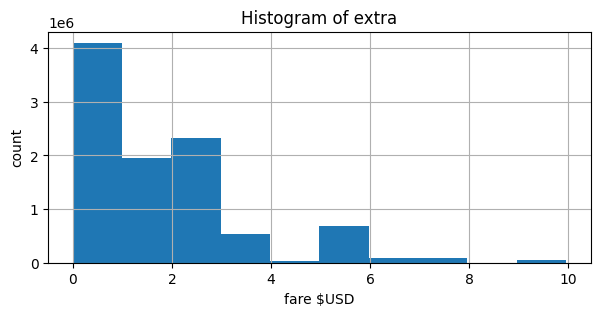

In [21]:
# plot histogram of fare
df_train[df_train.extra<10].extra.hist(bins=10, figsize=(7,3))
plt.xlabel('fare $USD')
plt.ylabel('count')
plt.title('Histogram of extra');
plt.show()

### 处理经纬度数据

### search New York city's boundary
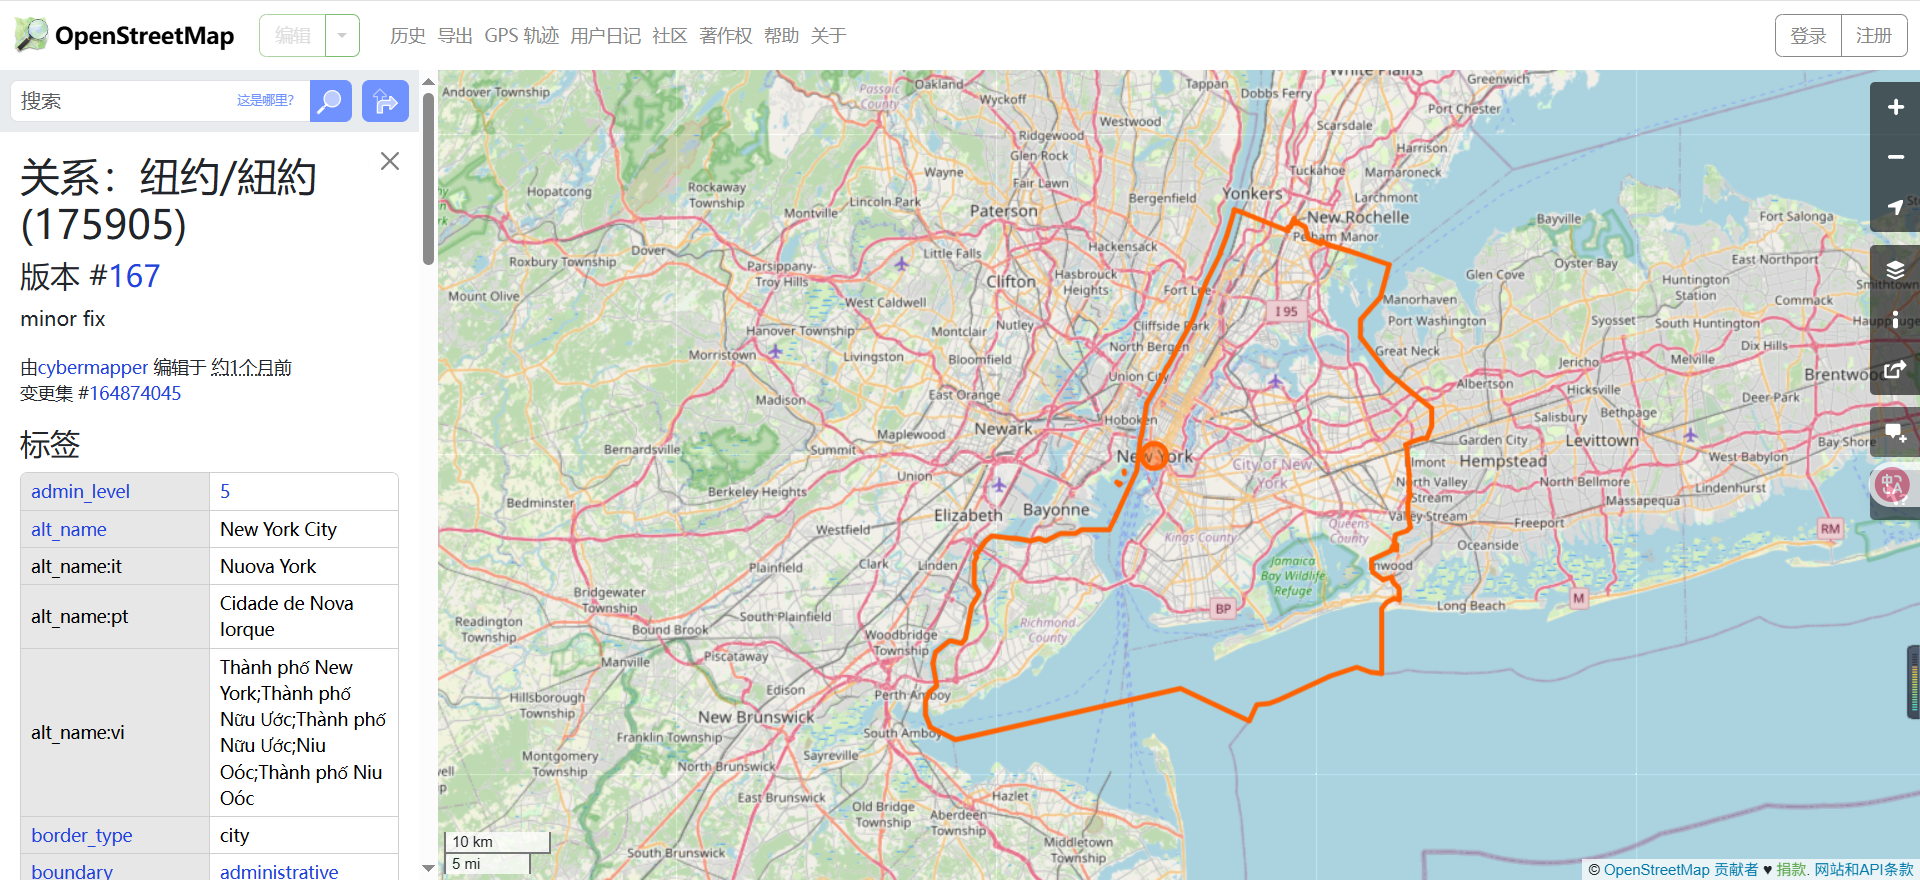

In [22]:
df_train['pulocationid'].value_counts(dropna=False)

,count
pulocationid,
237,485925
132,465006
161,464113
236,436030
162,352516
...,...
84,3
27,3
5,2


In [23]:
df_train['pulocationid'].value_counts(dropna=False)

,count
pulocationid,
237,485925
132,465006
161,464113
236,436030
162,352516
...,...
84,3
27,3
5,2


In [24]:
print('Old size: %d' % len(df_train))
df_train = df_train[df_train['pulocationid'].notnull() & df_train['pulocationid'].notnull()]
print('New size: %d' % len(df_train))

Old size: 9885535
New size: 9885535


In [25]:
df_train.to_csv('/content/drive/MyDrive/NYC_yellow_taxi/nyc_taxi_part_1_new.csv')
print("Finished!")

Finished!


### 将区域ID转变为经度和纬度

In [26]:
# Step 1: 读取原始数据和位置坐标表
taxi_df = pd.read_csv('/content/drive/MyDrive/NYC_yellow_taxi/nyc_taxi_part_1_new.csv')
zone_df = pd.read_csv("/content/drive/MyDrive/NYC_yellow_taxi/taxi_zone_with_coords.csv", usecols=["LocationID", "lat", "lon"])

# Step 2: 处理 pulocationid 的经纬度
pu_zone = zone_df.rename(columns={
    "LocationID": "pulocationid",
    "lat": "pickup_lat",
    "lon": "pickup_lon"
})

# 合并 pulocationid 经纬度
taxi_df = taxi_df.merge(pu_zone, how='left', on='pulocationid')

# 将 pulocationid 为 264 或 265 的坐标设为 NaN
pu_mask = taxi_df['pulocationid'].isin([264, 265])
taxi_df.loc[pu_mask, ['pickup_lat', 'pickup_lon']] = np.nan

# Step 3: 处理 dolocationid 的经纬度
do_zone = zone_df.rename(columns={
    "LocationID": "dolocationid",
    "lat": "dropoff_lat",
    "lon": "dropoff_lon"
})

# 合并 dolocationid 经纬度
taxi_df = taxi_df.merge(do_zone, how='left', on='dolocationid')

# 将 dolocationid 为 264 或 265 的坐标设为 NaN
do_mask = taxi_df['dolocationid'].isin([264, 265])
taxi_df.loc[do_mask, ['dropoff_lat', 'dropoff_lon']] = np.nan

# Step 4: 保存结果
taxi_df.to_csv("/content/drive/MyDrive/NYC_yellow_taxi/nyc_taxi_part_1_with_coords.csv", index=False)


print("✅ 已成功将经纬度追加到原始 CSV 文件中：nyc_taxi_part_1.csv")


✅ 已成功将经纬度追加到原始 CSV 文件中：nyc_taxi_part_1.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
train_data_2 = pd.read_csv("/content/drive/MyDrive/NYC_yellow_taxi/nyc_taxi_part_1_with_coords.csv")
train_data_2.head()

,Unnamed: 0,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon
0,0,2,2024-01-03T19:42:57.000,2024-01-03T20:15:55.000,1.0,16.67,1.0,N,132,165,...,5.00,0.00,1.0,73.55,0.0,1.75,40.642948,-73.779373,40.618882,-73.965489
1,1,2,2024-01-03T18:43:26.000,2024-01-03T18:43:29.000,2.0,0.01,5.0,N,95,95,...,17.54,0.00,1.0,105.23,0.0,0.00,40.723101,-73.846613,40.723101,-73.846613
2,2,2,2024-01-03T17:00:52.000,2024-01-03T17:01:05.000,2.0,0.00,5.0,N,265,265,...,0.00,0.00,1.0,121.00,0.0,0.00,NaN,NaN,NaN,NaN
3,3,2,2024-01-03T10:00:04.000,2024-01-03T11:08:22.000,1.0,21.60,1.0,N,132,136,...,18.46,6.94,1.0,110.75,0.0,1.75,40.642948,-73.779373,40.872570,-73.902662
4,4,2,2024-01-01T00:01:58.000,2024-01-01T00:10:04.000,3.0,1.70,1.0,N,234,144,...,2.36,0.00,1.0,18.06,2.5,0.00,40.736072,-73.990189,40.722500,-73.994000


In [4]:
train_data_2.dtypes

,0
vendorid,int64
tpep_pickup_datetime,object
tpep_dropoff_datetime,object
passenger_count,float64
trip_distance,float64
ratecodeid,float64
store_and_fwd_flag,object
pulocationid,int64
dolocationid,int64
payment_type,int64


In [6]:
train_data_2.shape

(10000000, 23)

(-74.25, -73.7115199)

In [8]:
# minimum and maximum latitude test
min(train_data_2.pickup_lat.min(), train_data_2.dropoff_lat.min()), \
max(train_data_2.pickup_lat.max(), train_data_2.dropoff_lat.max())

(40.5167, 40.8986)

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon
0,2,2024-01-03T19:42:57.000,2024-01-03T20:15:55.000,1.0,16.67,1.0,N,132,165,1,...,5.00,0.00,1.0,73.55,0.0,1.75,40.642948,-73.779373,40.618882,-73.965489
1,2,2024-01-03T18:43:26.000,2024-01-03T18:43:29.000,2.0,0.01,5.0,N,95,95,1,...,17.54,0.00,1.0,105.23,0.0,0.00,40.723101,-73.846613,40.723101,-73.846613
2,2,2024-01-03T17:00:52.000,2024-01-03T17:01:05.000,2.0,0.00,5.0,N,265,265,1,...,0.00,0.00,1.0,121.00,0.0,0.00,NaN,NaN,NaN,NaN
3,2,2024-01-03T10:00:04.000,2024-01-03T11:08:22.000,1.0,21.60,1.0,N,132,136,1,...,18.46,6.94,1.0,110.75,0.0,1.75,40.642948,-73.779373,40.872570,-73.902662
4,2,2024-01-01T00:01:58.000,2024-01-01T00:10:04.000,3.0,1.70,1.0,N,234,144,1,...,2.36,0.00,1.0,18.06,2.5,0.00,40.736072,-73.990189,40.722500,-73.994000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,2,2023-10-02T17:05:24.000,2023-10-02T18:11:24.000,2.0,22.34,2.0,N,132,230,1,...,17.19,6.94,1.0,104.88,2.5,1.75,40.642948,-73.779373,40.759508,-73.984159
9999996,1,2023-10-02T17:05:23.000,2023-10-02T17:21:18.000,3.0,1.70,1.0,N,161,143,2,...,0.00,0.00,1.0,22.10,2.5,0.00,40.765064,-73.985319,40.763935,-73.979460
9999997,2,2023-10-02T17:05:22.000,2023-10-02T17:19:19.000,5.0,1.41,1.0,N,43,163,1,...,4.00,0.00,1.0,24.00,2.5,0.00,40.782773,-73.965363,40.764840,-73.985172
9999998,2,2023-10-02T17:05:22.000,2023-10-02T17:27:14.000,6.0,4.43,1.0,N,170,43,2,...,0.00,0.00,1.0,30.50,2.5,0.00,40.748157,-73.978750,40.782773,-73.965363
